In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Classification

In [176]:
filename = 'glass.csv'
features = df.columns[:-1].tolist()
df = pd.read_csv(filename)

In [169]:
dir(df)

['Al',
 'Ba',
 'Ca',
 'Fe',
 'K',
 'Mg',
 'Na',
 'RI',
 'Si',
 'T',
 'Type',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__r

In [170]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [172]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [173]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [180]:
df.Type.value_counts()
# Unbalanced dataset

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Data Visualization
- Univariate plots
- Multivariate plots

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


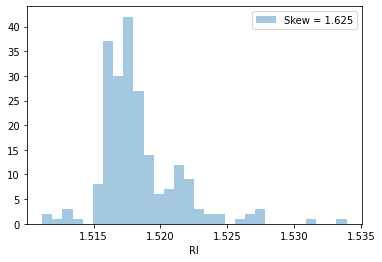

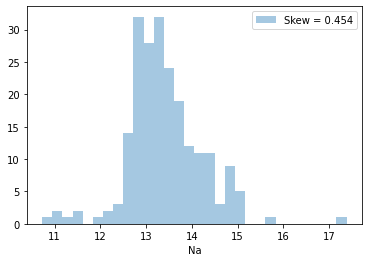

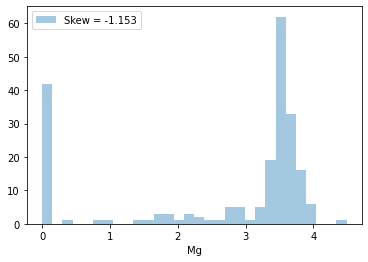

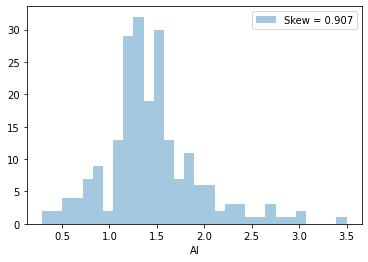

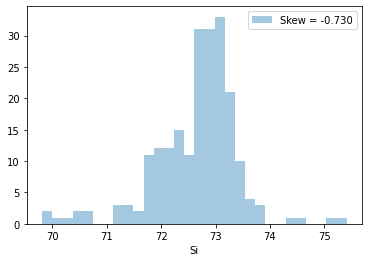

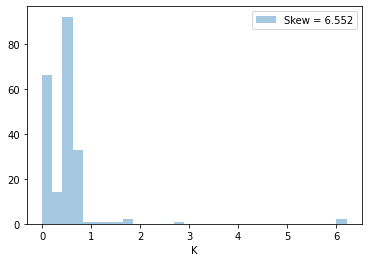

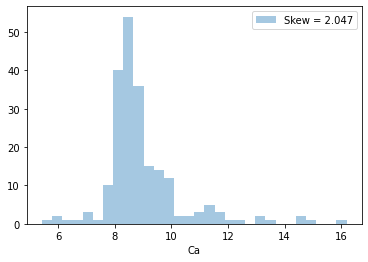

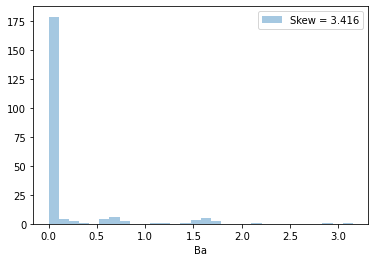

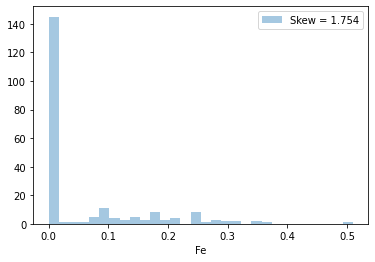

In [177]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' % (skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<Figure size 720x720 with 0 Axes>

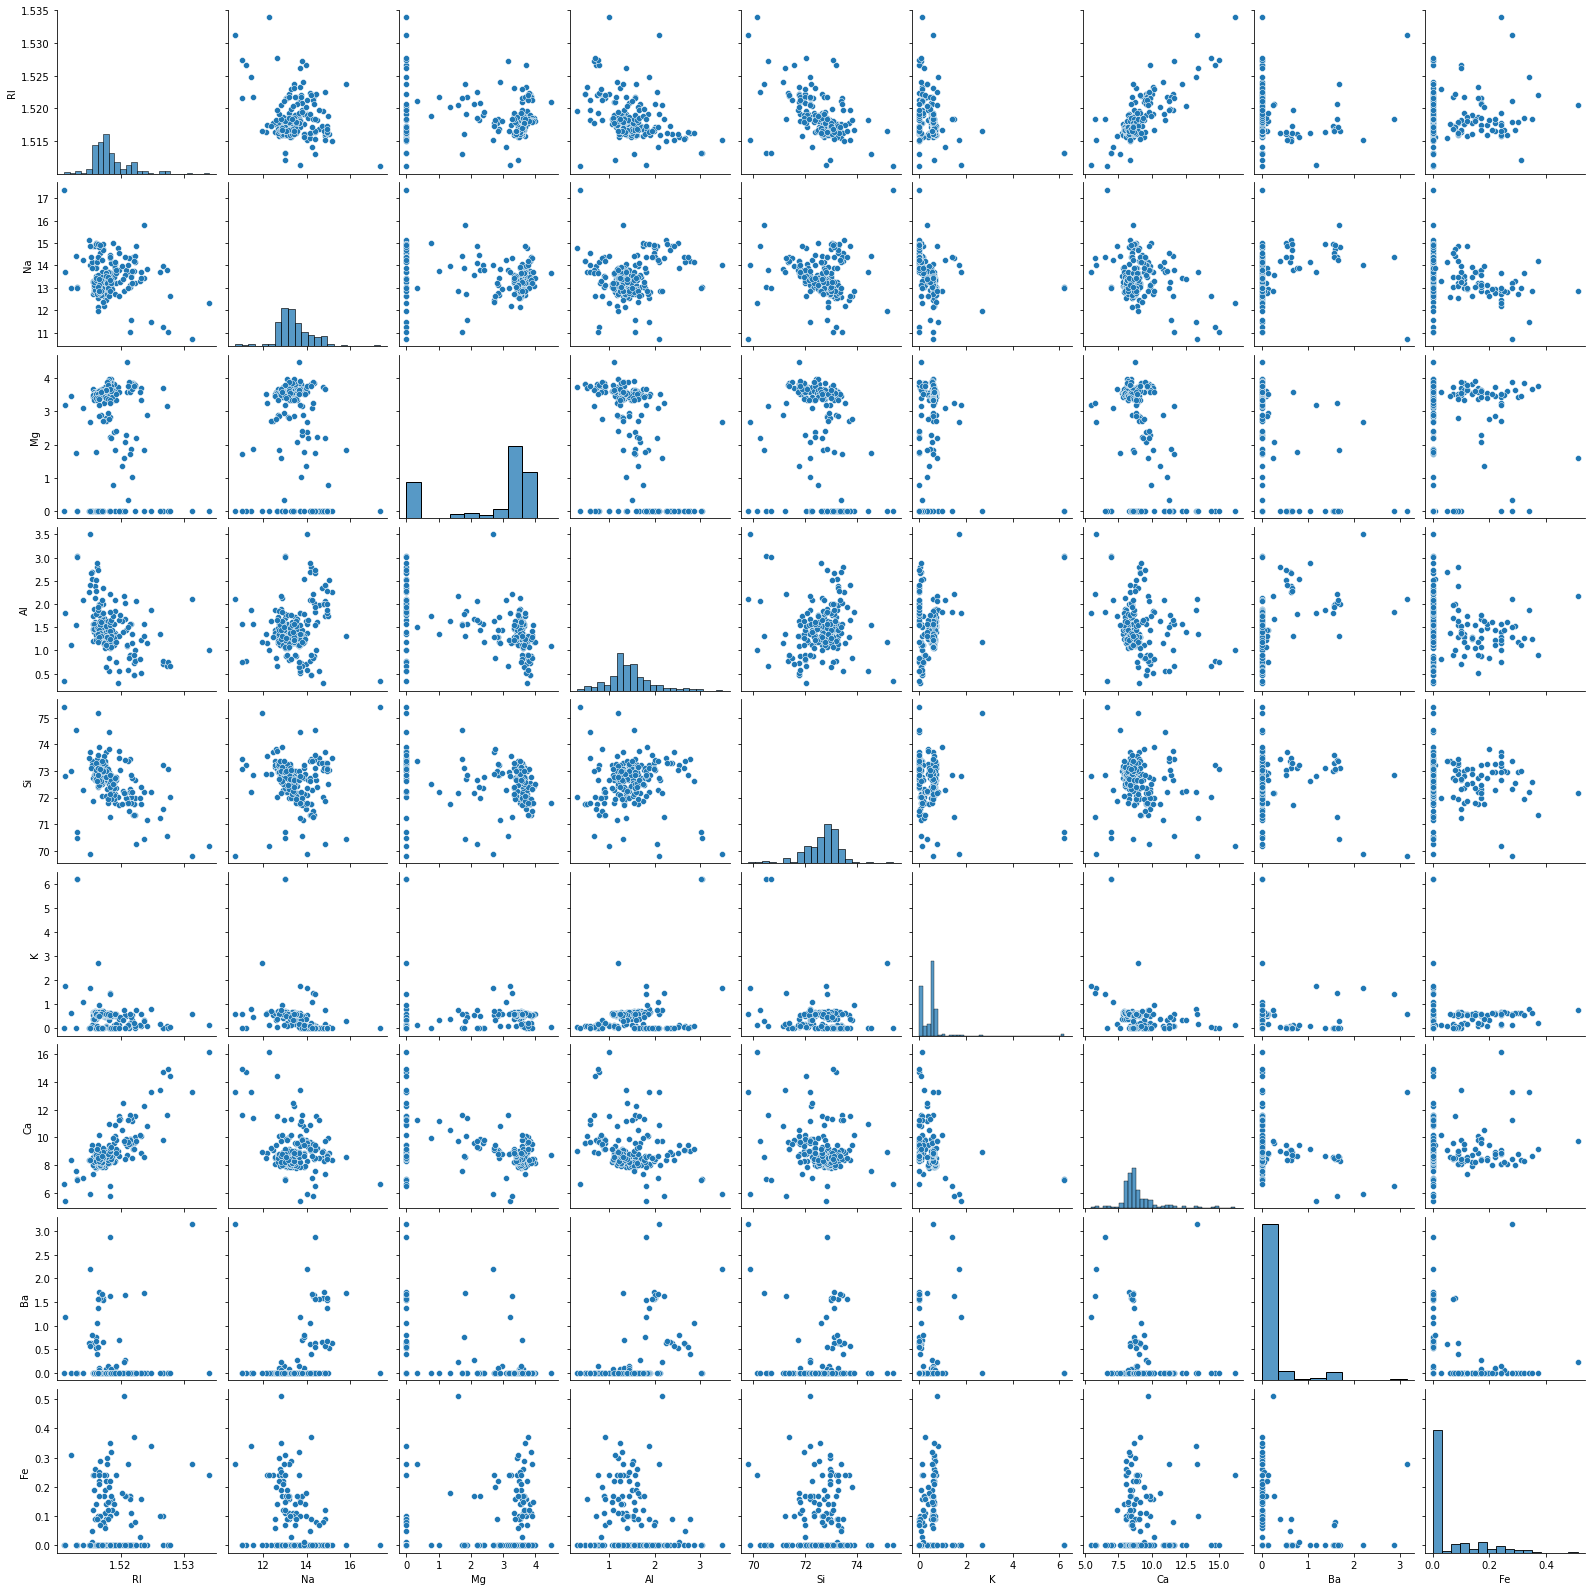

In [178]:
# Lets check out the pairplot
plt.figure(figsize=(10,10))
sns.pairplot(df[features])
plt.show()

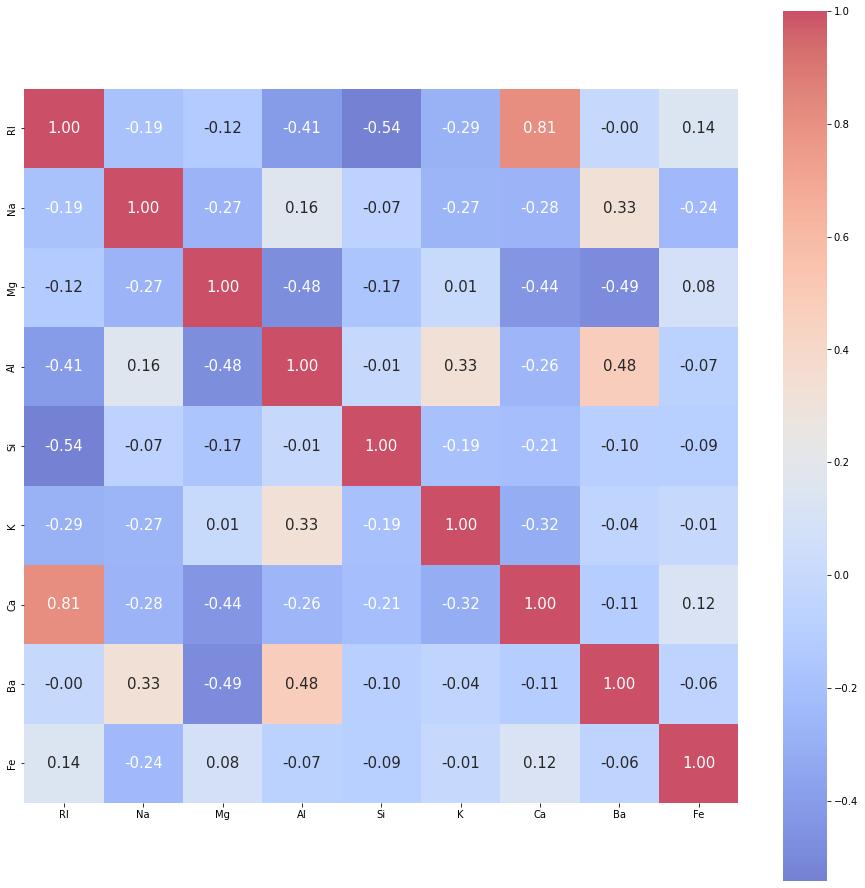

In [179]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df[features].corr(), cbar=True, fmt='.2f', xticklabels= features, annot_kws={'size': 15},
            yticklabels=features, alpha=0.7, cmap='coolwarm', square=True, annot=True)
plt.show()

<AxesSubplot:>

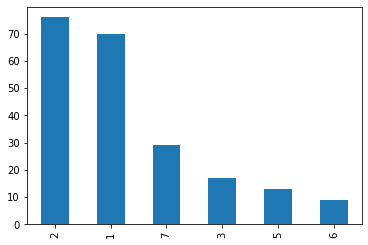

In [174]:
df['Type'].value_counts().plot(kind='bar')

In [181]:
df.size

2140

In [182]:
df.shape

(214, 10)

## Algorithms importations

In [203]:
x = df.drop('Type', axis=1)
y = df['Type']

In [204]:
x = x[['RI', 'Na', 'Al']]

In [205]:
x

,RI,Na,Al
0,1.52101,13.64,1.10
1,1.51761,13.89,1.36
2,1.51618,13.53,1.54
3,1.51766,13.21,1.29
4,1.51742,13.27,1.24
...,...,...,...
209,1.51623,14.14,2.88
210,1.51685,14.92,1.99
211,1.52065,14.36,2.02
212,1.51651,14.38,1.94


In [206]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [207]:
## Training the model

In [208]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [209]:
## Random Forect Classifier importation

In [210]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)

In [211]:
clf = clf.fit(x_train, y_train)

In [212]:
clf

RandomForestClassifier(n_estimators=10)

In [213]:
y_pred = clf.predict(x_test)

In [214]:
y_pred

array([1, 7, 1, 7, 7, 2, 1, 1, 2, 2, 6, 2, 1, 2, 6, 2, 2, 1, 1, 1, 2, 7,
       7, 7, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 7, 5, 3, 1, 7, 1, 7, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2], dtype=int64)

In [215]:
Training_accuracy = clf.score(x_train, y_train)
Test_accuracy = clf.score(x_test, y_test)

In [216]:
Training_accuracy

0.975

In [217]:
Test_accuracy

0.7037037037037037

In [218]:
pd.DataFrame({'actual_GlassType': y_test, 'predicted_GlassType': y_pred})

,actual_GlassType,predicted_GlassType
9,1,1
197,7,7
66,1,1
191,7,7
117,2,7
111,2,2
15,1,1
86,2,1
75,2,2
144,2,2


In [219]:
## confusion matrix

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


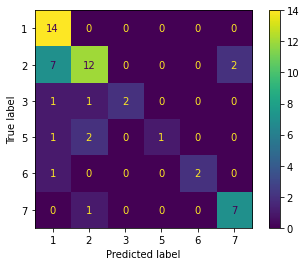

In [220]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_test,y_test)

In [221]:
from sklearn.metrics import classification_report

In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      1.00      0.74        14
           2       0.75      0.57      0.65        21
           3       1.00      0.50      0.67         4
           5       1.00      0.25      0.40         4
           6       1.00      0.67      0.80         3
           7       0.78      0.88      0.82         8

    accuracy                           0.70        54
   macro avg       0.85      0.64      0.68        54
weighted avg       0.76      0.70      0.69        54



In [223]:
## Logistic Regression 

In [224]:
from sklearn.linear_model import LogisticRegression

In [225]:
Lr_model  = LogisticRegression()

In [226]:
Lr_model

LogisticRegression()

In [227]:
Lr_model.fit(x_train, y_train)

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [228]:
from sklearn.metrics import accuracy_score

training_accuracy = Lr_model.score(x_train,y_train)
test_accuracy =Lr_model.score(x_test,y_test)

In [229]:
print(f'Training accuracy: {training_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.5625
Test accuracy: 0.5925925925925926


In [230]:
## Decision Tree Classifier

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
tree_model = DecisionTreeClassifier()

In [233]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [234]:
tree_model.score(x_train, y_train)

1.0

In [235]:
from sklearn.metrics import accuracy_score 

In [236]:
tree_model.score(x_test, y_test)

0.6111111111111112

## Model Deployment with gradio

In [238]:
import gradio as gr

## Model deployment with gradio
- define a function with input as argument and prediction as return value
- define inputs and outputs
- define your app
- launch your app

In [239]:
def predict_GlassType(RI,Na,Al):
    x = np.array([RI,Na,Al])
    pred = clf.predict(x.reshape(1, -1))
    return pred[0]

In [240]:
RI = gr.inputs.Number(label='RI')
Na = gr.inputs.Number(label='Na')
Al = gr.inputs.Number(label='Al')
output = gr.outputs.Textbox(label='Glass Type')

In [241]:
app = gr.Interface(predict_GlassType, inputs=[RI,Na,Al], outputs=output, description= 'This is a Glass Type Predictor')

In [242]:
app.launch()

Running on local URL:  http://127.0.0.1:7866/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x16c458943d0>,
 'http://127.0.0.1:7866/',
 None)